# Railway Incidents Data - Regression

## This script contains the following points:
1. Importing Libraries
2. Importing Data
3. Checking Data
4. Data preparation for regression analysis
5. Regression analysis
6. Performance improvement after removing outliers

# 1. Importing Libraries


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

# 2. Importing Data


In [4]:
# Project folder path
path=r'C:\Users\maryn\Documents\Data Projects\Railway Incidents Data'

In [5]:
# Import dataset RID_clean_1.csv
df_RID = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'RID_clean_1.csv'), index_col = False)

# 3. Checking Data

In [6]:
df_RID.head()

,Unnamed: 0,reporting_railroad_code,railroad_name,year,accident_id,month,accident_type,state,fra_district,train_speed,temperature,visibility,weather_condition,has_passengers,damage_cost,persons_killed,persons_injured
0,0,NICD,Northern Indiana Commuter Transportation District,2017,N1700013,6,Derailment,ILLINOIS,4,10.0,65.0,Day,Clear,Yes,0.0,0.0,0.0
1,1,NIRC,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,2017,201707188,6,Derailment,ILLINOIS,4,0.0,65.0,Day,Clear,Unknown,0.0,0.0,0.0
2,2,CR,Conrail,1981,0420001,4,Side collision,NEW YORK,1,0.0,28.0,Day,Snow,No,0.0,0.0,0.0
3,3,IC,Illinois Central Railroad Company,2007,543854,1,Derailment,LOUISIANA,5,4.0,56.0,Day,Cloudy,No,0.0,0.0,0.0
4,4,IC,Illinois Central Railroad Company,2017,938223,10,Hwy-rail crossing,ILLINOIS,4,0.0,66.0,Dark,Clear,No,0.0,0.0,1.0


In [7]:
# Drop the 'Unnamed: 0' column
df_RID.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df_RID.head()

,reporting_railroad_code,railroad_name,year,accident_id,month,accident_type,state,fra_district,train_speed,temperature,visibility,weather_condition,has_passengers,damage_cost,persons_killed,persons_injured
0,NICD,Northern Indiana Commuter Transportation District,2017,N1700013,6,Derailment,ILLINOIS,4,10.0,65.0,Day,Clear,Yes,0.0,0.0,0.0
1,NIRC,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,2017,201707188,6,Derailment,ILLINOIS,4,0.0,65.0,Day,Clear,Unknown,0.0,0.0,0.0
2,CR,Conrail,1981,0420001,4,Side collision,NEW YORK,1,0.0,28.0,Day,Snow,No,0.0,0.0,0.0
3,IC,Illinois Central Railroad Company,2007,543854,1,Derailment,LOUISIANA,5,4.0,56.0,Day,Cloudy,No,0.0,0.0,0.0
4,IC,Illinois Central Railroad Company,2017,938223,10,Hwy-rail crossing,ILLINOIS,4,0.0,66.0,Dark,Clear,No,0.0,0.0,1.0


In [9]:
# Check the data types of columns
df_RID.dtypes

reporting_railroad_code     object
railroad_name               object
year                         int64
accident_id                 object
month                        int64
accident_type               object
state                       object
fra_district                 int64
train_speed                float64
temperature                float64
visibility                  object
weather_condition           object
has_passengers              object
damage_cost                float64
persons_killed             float64
persons_injured            float64
dtype: object

In [10]:
df_RID.shape

(210666, 16)

In [11]:
# Check for missing values
df_RID.isnull().sum()

reporting_railroad_code    0
railroad_name              0
year                       0
accident_id                0
month                      0
accident_type              0
state                      0
fra_district               0
train_speed                0
temperature                0
visibility                 0
weather_condition          0
has_passengers             0
damage_cost                0
persons_killed             0
persons_injured            0
dtype: int64

In [12]:
dups = df_RID.duplicated()

In [13]:
dups.shape

(210666,)

C:\Users\maryn\AppData\Local\Temp\ipykernel_19300\1302255954.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_RID['train_speed'], bins=25)
C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='train_speed', ylabel='Density'>

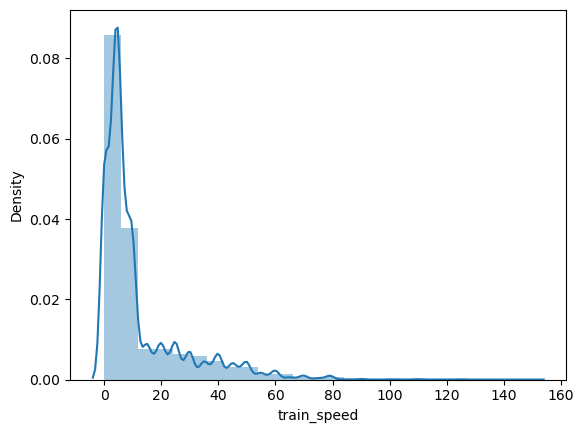

In [14]:
# Extreme values checks
sns.distplot(df_RID['train_speed'], bins=25)

C:\Users\maryn\AppData\Local\Temp\ipykernel_19300\1915473561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_RID['persons_killed'], bins=5)
C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='persons_killed', ylabel='Density'>

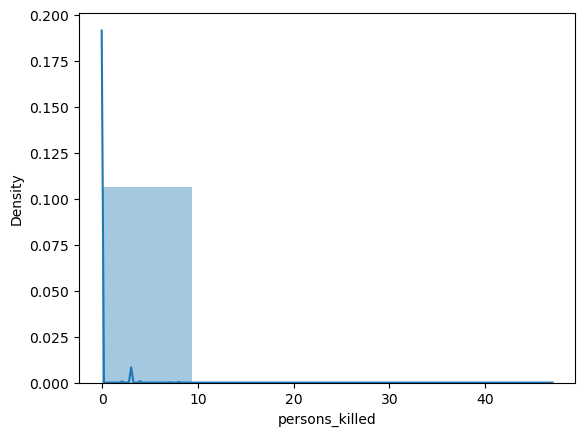

In [16]:
sns.distplot(df_RID['persons_killed'], bins=5)

In [54]:
# Check mean, median and max of variables 'train_speed', 'persons_killed'
df_RID[['train_speed', 'persons_killed']].describe().astype(int)

,train_speed,persons_killed
count,210666,210666
mean,11,0
std,15,0
min,0,0
25%,3,0
50%,5,0
75%,12,0
max,150,47


In [23]:
df_RID['persons_killed'].value_counts(dropna = False)

persons_killed
0.0     207783
1.0       2287
2.0        376
3.0        112
4.0         49
5.0         15
6.0         11
7.0          9
11.0         8
8.0          5
16.0         3
25.0         2
47.0         2
10.0         2
9.0          2
Name: count, dtype: int64

# 4. Data preparation for regression analysis

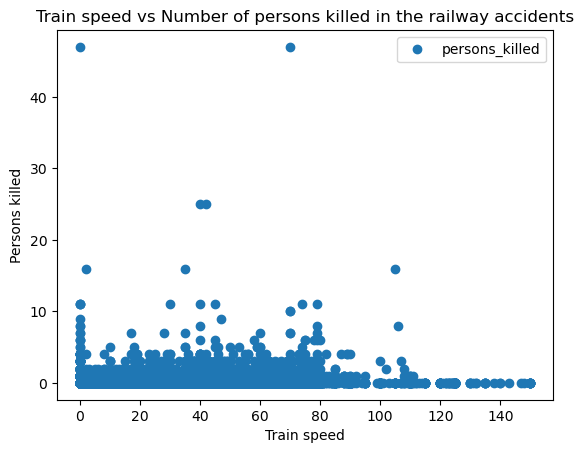

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_RID.plot(x = 'train_speed', y='persons_killed',style='o')
plt.title('Train speed vs Number of persons killed in the railway accidents')  
plt.xlabel('Train speed')  
plt.ylabel('Persons killed')  
plt.show()

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_RID['train_speed'].values.reshape(-1,1)
y = df_RID['persons_killed'].values.reshape(-1,1)

In [30]:
X

array([[10.],
       [ 0.],
       [ 0.],
       ...,
       [ 5.],
       [30.],
       [ 8.]])

In [31]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [32]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. Regression analysis

In [33]:
# Create a regression object.
regression = LinearRegression()

In [34]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

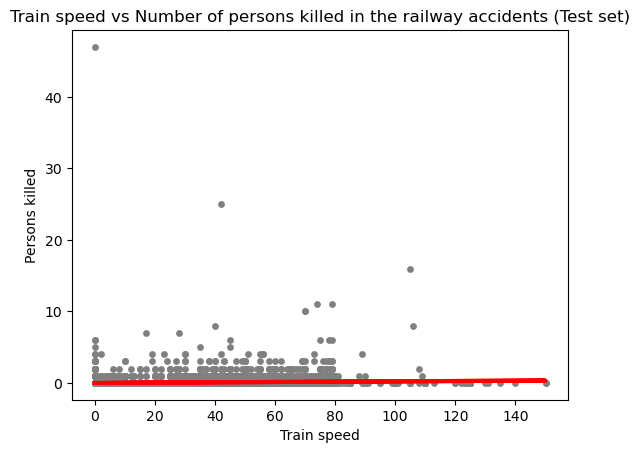

In [36]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Train speed vs Number of persons killed in the railway accidents (Test set)')
plot_test.xlabel('Train speed')
plot_test.ylabel('Persons killed')
plot_test.show()

### The almost horizontal regression line suggests that the model does not show a significant relationship between train speed and the number of fatalities. This may indicate that train speed alone is not a strong predictor of the number of fatalities in railway accidents.

In [37]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [38]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00221139]]
Mean squared error:  0.09039282071428499
R2 score:  0.014465895561980413


In [39]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.0,-0.006925
1,0.0,-0.002502
2,0.0,0.015189
3,0.0,0.092588
4,2.0,0.081531
5,0.0,-0.000291
6,0.0,0.019612
7,0.0,0.070474
8,0.0,-0.006925
9,0.0,0.006343


### The slope is very close to zero, indicating that the relationship between train speed and the number of fatalities is extremely weak. 
### Although the MSE is low, it may not be a strong indicator of model performance in the context of the data, which contains mostly zeros.
### The R-squared value is very close to zero, indicating that the model does not explain much of the variability in the number of fatalities based on train speed. 
### This interpretation is also illustrated by a mismatch in the comparison of actual and predicted values of y.

# 6. Performance improvement after removing outliers

In [40]:
# Clean the extreme values from the 'persons_killed' variable observed during the consistency checks.
df_test = df_RID[df_RID['persons_killed'] <=20] 

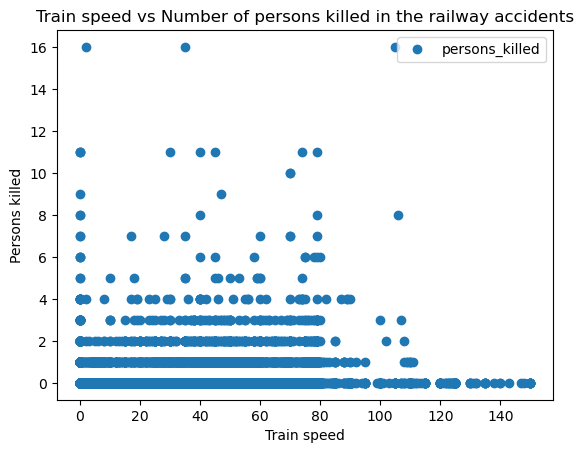

In [41]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'train_speed', y='persons_killed', style='o')  
plt.title('Train speed vs Number of persons killed in the railway accidents')  
plt.xlabel('Train speed')  
plt.ylabel('Persons killed')  
plt.show()

### After the outliers have been removed, the plot shows the variability and distribution of the data points more clearly. However, it still lacks the regression line and emphasises the absence of a clear trend.

In [46]:
# Reshape the variables
X_2 = df_test['train_speed'].values.reshape(-1,1)
y_2 = df_test['persons_killed'].values.reshape(-1,1)

In [47]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [48]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [49]:
# Predict the values of y using X
y_predicted_2 = regression.predict(X_test_2)

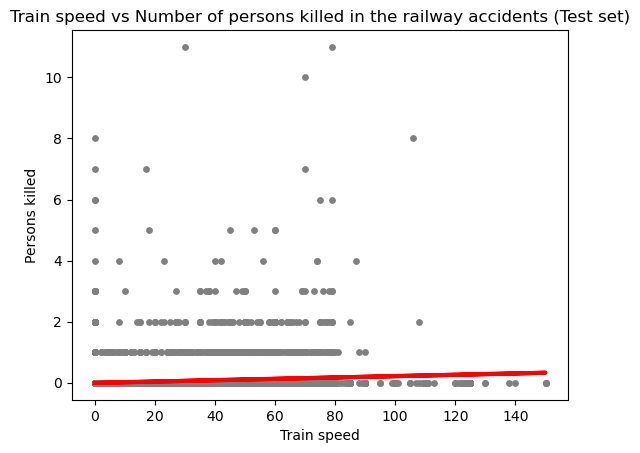

In [50]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Train speed vs Number of persons killed in the railway accidents (Test set)')
plot_test.xlabel('Train speed')
plot_test.ylabel('Persons killed')
plot_test.show()

### The regression line has a slight upward slope, indicating a minimal positive relationship between train speed and fatalities.

In [51]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [52]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00222126]]
Mean squared error:  0.03862972642119213
R2 score:  0.026924016372991688


In [53]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,0.0,-0.007257
1,0.0,0.001628
2,0.0,0.014955
3,0.0,0.003849
4,0.0,0.048274
5,0.0,-0.007257
6,0.0,0.019398
7,0.0,0.103806
8,0.0,-0.007257
9,0.0,0.054938


### The slope of the second regression attempt is slightly higher than the first, but the difference is minimal. It is still very close to zero.
### The MSE of the second regression is lower and the R-squared value is higher than in the first regression, indicating that the second model explains slightly more of the variance in the number of fatalities based on train speed. However, the R-squared value is still very low, indicating an overall poor fit.